In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,NaN,4.0,130.0,NaN,0.0,2,NaN,0.0,2.4,NaN,NaN,NaN
1,0.0,67.0,NaN,NaN,NaN,0.0,2,160.0,NaN,NaN,NaN,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,NaN,NaN,NaN,0.0,0,105.0,1.0,0.2,NaN,NaN,NaN
4,0.0,74.0,2.0,120.0,269.0,0.0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,NaN,NaN,NaN,1.0,0,162.0,0.0,0.5,NaN,NaN,NaN
266,1.0,44.0,2.0,120.0,263.0,0.0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	28
float64		column 2	44
float64		column 3	42
float64		column 4	58
float64		column 5	56
float64		column 6	14
int64		column 7	0
float64		column 8	58
float64		column 9	86
float64		column 10	56
float64		column 11	114
float64		column 12	72
float64		column 13	56


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,242.000000,226.000000,228.000000,212.000000,214.000000,256.000000,270.000000,212.000000,184.000000,214.000000,156.000000,198.000000,214.000000
mean,0.681818,54.097345,3.166667,131.344340,249.242991,0.152344,1.022222,149.080189,0.315217,1.076168,1.589744,0.621212,4.682243
std,0.466736,9.095996,0.961063,17.582286,48.937316,0.360058,0.997891,23.553070,0.465870,1.145000,0.610360,0.914050,1.936058
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,47.250000,3.000000,120.000000,213.250000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,152.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,60.000000,4.000000,140.000000,282.000000,0.000000,2.000000,165.000000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

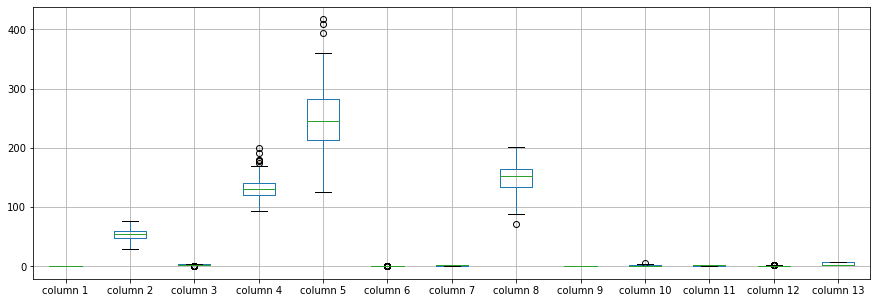

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.681818
column 2      54.097345
column 3       3.166667
column 4     131.344340
column 5     249.242991
column 6       0.152344
column 7       1.022222
column 8     149.080189
column 9       0.315217
column 10      1.076168
column 11      1.589744
column 12      0.621212
column 13      4.682243
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.105993,0.069357,-0.054385,-0.170542,0.035410,-0.004450,-0.045301,0.125663,0.050308,0.037251,0.043200,0.353789
column 2,-0.105993,1.000000,0.045482,0.290496,0.164578,0.159866,0.115466,-0.396960,0.049115,0.154681,0.167874,0.320695,0.123394
column 3,0.069357,0.045482,1.000000,-0.039447,0.080124,-0.145743,0.051245,-0.355471,0.367861,0.155721,0.125872,0.178787,0.309393
column 4,-0.054385,0.290496,-0.039447,1.000000,0.194100,0.137242,0.145813,-0.010033,0.100939,0.269993,0.193289,0.129956,0.116036
column 5,-0.170542,0.164578,0.080124,0.194100,1.000000,0.086750,0.113287,-0.024277,0.206637,0.033465,0.054177,0.039231,0.069759
column 6,0.035410,0.159866,-0.145743,0.137242,0.086750,1.000000,0.058043,0.036599,-0.002684,-0.015170,0.085694,0.102247,-0.027771
column 7,-0.004450,0.115466,0.051245,0.145813,0.113287,0.058043,1.000000,-0.031575,0.065545,0.124819,0.175449,0.104739,0.055344
column 8,-0.045301,-0.396960,-0.355471,-0.010033,-0.024277,0.036599,-0.031575,1.000000,-0.333325,-0.302611,-0.347500,-0.275450,-0.242016
column 9,0.125663,0.049115,0.367861,0.100939,0.206637,-0.002684,0.065545,-0.333325,1.000000,0.163377,0.175604,0.178937,0.416695
column 10,0.050308,0.154681,0.155721,0.269993,0.033465,-0.015170,0.124819,-0.302611,0.163377,1.000000,0.609280,0.272012,0.308308


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+108,13+108+108,13+108+108+108,13+108+108+108+108,13+108+108+108+108+108,13+108+108+108+108,13+108+108+108,13+108+108,13+108,13], vae_layer = False, seed = 108)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 481.9003143310547
Epoch: 1 , loss: 480.3266201019287
Epoch: 2 , loss: 481.8191089630127
Epoch: 3 , loss: 481.731969833374
Epoch: 4 , loss: 479.2723922729492
Epoch: 5 , loss: 482.5139446258545
Epoch: 6 , loss: 484.5517768859863
Epoch: 7 , loss: 484.2584590911865
Epoch: 8 , loss: 480.7022476196289
Epoch: 9 , loss: 479.5227851867676
Epoch: 10 , loss: 481.9921226501465
Epoch: 11 , loss: 477.78043365478516
Epoch: 12 , loss: 479.0372943878174
Epoch: 13 , loss: 475.21826171875
Epoch: 14 , loss: 471.5939197540283
Epoch: 15 , loss: 471.8201274871826
Epoch: 16 , loss: 473.1461944580078
Epoch: 17 , loss: 471.5250701904297
Epoch: 18 , loss: 474.21227836608887
Epoch: 19 , loss: 467.41098976135254
Epoch: 20 , loss: 469.80175590515137
Epoch: 21 , loss: 456.5578098297119
Epoch: 22 , loss: 437.9625949859619
Epoch: 23 , loss: 415.5617256164551
Epoch: 24 , loss: 392.59459686279297
Epoch: 25 , loss: 368.18892669677734
Epo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,-49.455088,0.000000,0.000000,-242.440292,0.0,0,-63.872662,0.000000,0.000000,-0.759674,-2.506957,-0.992230
1,0.0,0.000000,-0.154328,-56.030048,-408.836517,0.0,0,0.000000,-0.137940,0.182524,-0.271162,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,-0.013435,-11.249207,-68.340714,0.0,0,0.000000,0.000000,0.000000,0.443944,-0.619770,-2.617161
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.000000,3.362434,11.221573,111.972198,0.0,0,0.000000,0.000000,0.000000,2.891173,0.657250,-0.047764
266,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
267,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
268,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1296.0849468703466, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.23936181250164512

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,20.544912,4.000000,130.000000,79.559708,0.0,2,45.127338,0.000000,2.400000,1.240326,0.493043,2.007770
1,0.0,67.000000,2.845672,58.969952,155.163483,0.0,2,160.000000,-0.137940,1.782524,1.728838,0.000000,7.000000
2,1.0,57.000000,2.000000,124.000000,261.000000,0.0,0,141.000000,0.000000,0.300000,1.000000,0.000000,7.000000
3,1.0,64.000000,3.986565,116.750793,194.659286,0.0,0,105.000000,1.000000,0.200000,2.443944,0.380230,4.382839
4,0.0,74.000000,2.000000,120.000000,269.000000,0.0,2,121.000000,1.000000,0.200000,1.000000,1.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.000000,6.362434,183.221573,310.972198,1.0,0,162.000000,0.000000,0.500000,3.891173,0.657250,6.952236
266,1.0,44.000000,2.000000,120.000000,263.000000,0.0,0,173.000000,0.000000,0.000000,1.000000,0.000000,7.000000
267,0.0,56.000000,2.000000,140.000000,294.000000,0.0,2,153.000000,0.000000,1.300000,2.000000,0.000000,3.000000
268,1.0,57.000000,4.000000,140.000000,192.000000,0.0,0,148.000000,0.000000,0.400000,2.000000,0.000000,6.000000


In [20]:
imputations[-1].to_excel("Sheart_AL_20(imp).xlsx", index=False, header=False)